In [1]:
# data:
require(AppliedPredictiveModeling)

# modelling:
require(rpart)
require(rpart.plot)

Loading required package: AppliedPredictiveModeling
Loading required package: rpart
Loading required package: rpart.plot


In [2]:
set.seed(1)

In [3]:
data(abalone)

`help(abalone)`

Segunda a documentação da base de dados Abalone:

> The age of the abalone is the number of rings plus 1.5

portanto:

In [4]:
abalone$Age <- abalone[, 'Rings'] + 1.5
abalone$Rings <- NULL

In [5]:
summary(abalone)

 Type      LongestShell      Diameter          Height        WholeWeight    
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 ShuckedWeight    VisceraWeight     ShellWeight          Age       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 2.50  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 9.50  
 Median :0.3360   Median :0.1710   Median :0.2340   Median :10.50  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   :11.43  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:12.50  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.0050   M

In [6]:
train <- abalone[1:3000,]
valid <- abalone[3000:nrow(abalone),]

In [7]:
arvore1 <- rpart(Age ~ ., data = train)

# 1. Qual o tamanho da árvore? Qual o número de partições?

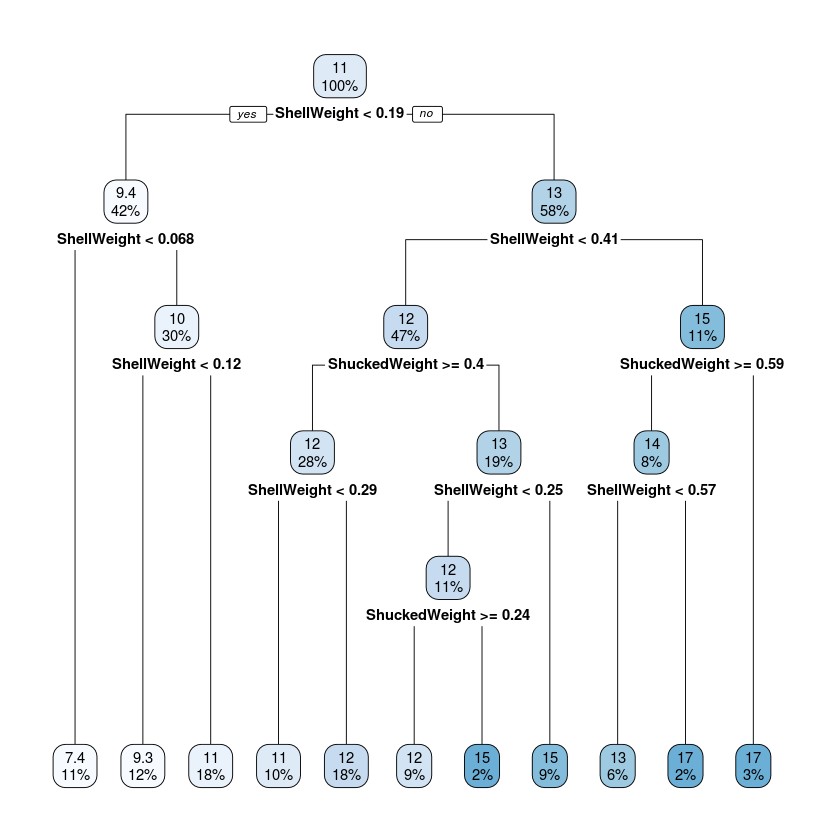

In [8]:
rpart.plot(arvore1)

In [9]:
printcp(arvore1)


Regression tree:
rpart(formula = Age ~ ., data = train)

Variables actually used in tree construction:
[1] ShellWeight   ShuckedWeight

Root node error: 33031/3000 = 11.01

n= 3000 

         CP nsplit rel error  xerror     xstd
1  0.281965      0   1.00000 1.00054 0.038430
2  0.050344      1   0.71804 0.72751 0.030446
3  0.049949      2   0.66769 0.68296 0.029040
4  0.021585      3   0.61774 0.64712 0.027587
5  0.021031      5   0.57457 0.62956 0.027037
6  0.014659      6   0.55354 0.59900 0.026056
7  0.013786      7   0.53888 0.58265 0.025122
8  0.013490      8   0.52510 0.58174 0.025109
9  0.011247      9   0.51161 0.57714 0.024960
10 0.010000     10   0.50036 0.56771 0.024777


A árvore possui 11 nós finais e faz 10 partições no total

# 2. Quantas covariáveis aparecem no ajuste da árvore?

In [10]:
arvore2 <- prune(arvore1, cp = 0.001)

In [11]:
printcp(arvore2)


Regression tree:
rpart(formula = Age ~ ., data = train)

Variables actually used in tree construction:
[1] ShellWeight   ShuckedWeight

Root node error: 33031/3000 = 11.01

n= 3000 

         CP nsplit rel error  xerror     xstd
1  0.281965      0   1.00000 1.00054 0.038430
2  0.050344      1   0.71804 0.72751 0.030446
3  0.049949      2   0.66769 0.68296 0.029040
4  0.021585      3   0.61774 0.64712 0.027587
5  0.021031      5   0.57457 0.62956 0.027037
6  0.014659      6   0.55354 0.59900 0.026056
7  0.013786      7   0.53888 0.58265 0.025122
8  0.013490      8   0.52510 0.58174 0.025109
9  0.011247      9   0.51161 0.57714 0.024960
10 0.010000     10   0.50036 0.56771 0.024777


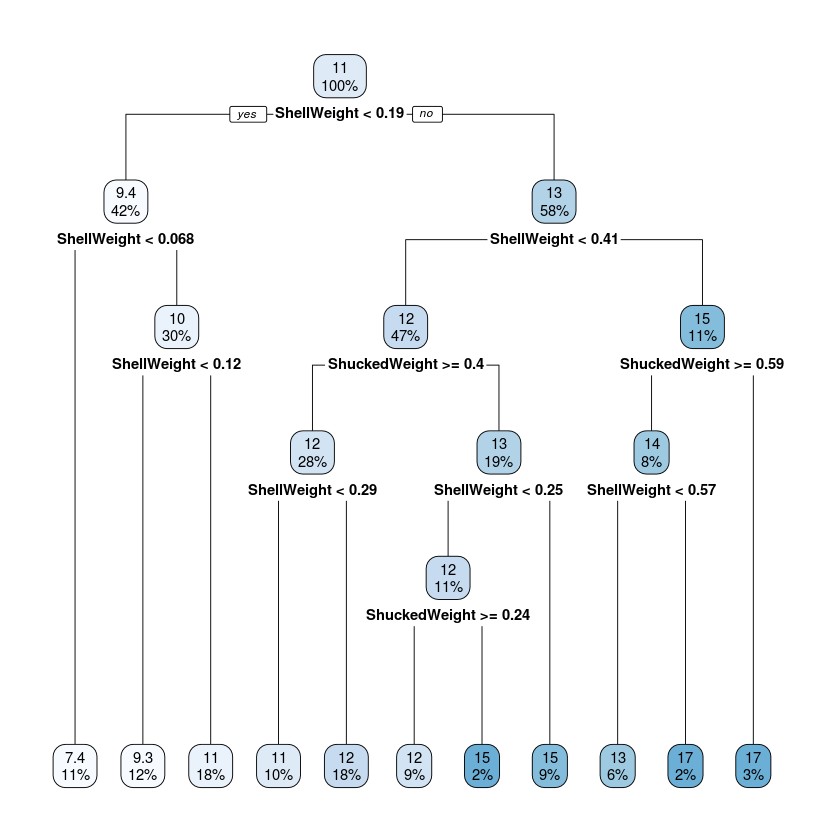

In [12]:
rpart.plot(arvore2)

2 covariáveis aparecem no ajuste: ShellWeight e ShuckedWeight

# 3. Qual a idade estimada para moluscos com:
a) ShellWeight=0.18 e ShuckedWeight=0.25;

b) ShellWeight=0.31 e ShuckedWeight=0.45?

In [13]:
str(abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Type         : Factor w/ 3 levels "F","I","M": 3 3 1 3 2 2 1 1 3 1 ...
 $ LongestShell : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Age          : num  16.5 8.5 10.5 11.5 8.5 9.5 21.5 17.5 10.5 20.5 ...


In [14]:
new_data <- data.frame(Type = as.factor(c(NA, NA)),
                       LongestShell = as.numeric(c(NA, NA)),
                       Diameter = as.numeric(c(NA, NA)),
                       Height = as.numeric(c(NA, NA)),
                       WholeWeight = as.numeric(c(NA, NA)),
                       ShuckedWeight = c(0.25, 0.45),
                       VisceraWeight = as.numeric(c(NA, NA)),
                       ShellWeight = c(0.18, 0.31))

In [15]:
predict(arvore2, newdata = new_data)

1        2 
10.57117 12.47723

a) ShellWeight=0.18 e ShuckedWeight=0.25: idade estimada em 10.57

b) ShellWeight=0.31 e ShuckedWeight=0.45: idade estimada em 12.47

# 4. Qual o resíduo para cada um dos dados? Considere, para o primeiro, Rings=8 e para o segundo Rings=10.

In [16]:
# resíduo para o primeiro dado:

print(paste('resíduo para o primeiro ponto: ', 8 - (predict(arvore2, newdata=new_data[1, ])-1.5)))

# resíduo para o segundo dado:
print(paste('resíduo para o segundo ponto: ', 10 - (predict(arvore2, newdata=new_data[2, ])-1.5)))

[1] "resíduo para o primeiro ponto:  -1.07116788321168"
[1] "resíduo para o segundo ponto:  -0.977229601518026"


# 5. Usando os dados de validação, calcule e apresente o valor da soma de quadrados de resíduos

In [17]:
pred <- predict(arvore2, newdata=valid)

In [18]:
print(paste('valor da soma de quadrados dos resíduos é:', sum((valid$Age - pred) ** 2)))

[1] "valor da soma de quadrados dos resíduos é: 5986.23435101563"
